# **Método del codo y la silueta**

## *Objetivo:* Calcula las distancias cuadradas dentro de cada cluster y el coeficiente de silueta para un rango de 30 posibles agrupamientos, con el objetivo de determinar el número óptimo de clusters en los datos filtrados.

### 1. Se cargan librerías y se declaran variables

In [1]:
### Se cargan librerias ###
import numpy as np
import pandas as pd 
import json
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.colors
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

### Se carga archivo con los grid_search.best_params_ ####
with open('datos/grid_search.json', 'r') as file:
    grid_search = json.load(file)
X = np.load('datos/X.npy')

### Se declaran listas ###
wcss = []
sil_values = []

### Se define rango dle numero de clusters ###
range_n_clusters = range(2, 32)

### 2. Se realizan los cálculos de los valores  valor de WCSS (Within-Cluster Sum of Squares) y Silhouette Coefficient para cada uno de los posibles clusters

In [2]:
### Se realiza la iteración de clusters con los parametros hallados ###
for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i, 
                init=grid_search['init'], 
                max_iter=grid_search['max_iter'], 
                tol=grid_search['tol'], 
                algorithm=grid_search['algorithm'], 
                random_state=grid_search['random_state']
                )
    kmeans.fit(X)
    ### Se guardan las distancias cuadradas de cada cluster ###
    wcss.append(kmeans.inertia_)
    ### Se guardan el Silhoutte Coefficent de cada cluster ###
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil_values.append(silhouette_avg)

### 3. Se obtiene el número de clusters ideal

In [3]:
### Se halla a cual cluster le corresponde el Silhoutte Coefficent mas grande ###
sil_values = np.array( sil_values )
n_clusters_g = np.argmax(sil_values) + 2

### Se imprimen resultados ###
print( 'El valor Silhoutte Coefficent máximo es:', sil_values[ np.argmax(sil_values) ] )
print( 'El número óptimo de clusters es:', np.argmax(sil_values) + 2 )

El valor Silhoutte Coefficent máximo es: 0.45620049279703623
El número óptimo de clusters es: 7


### 4. Se grafican resultados

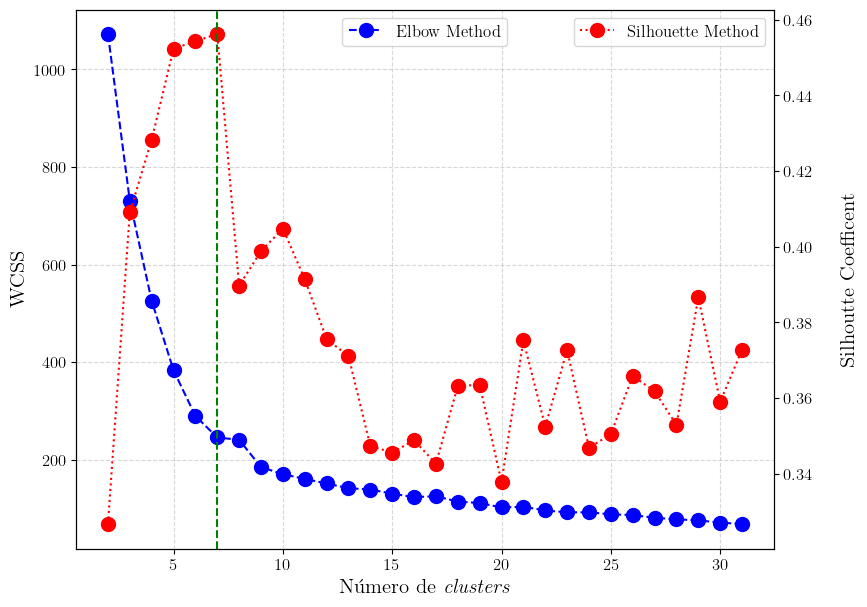

In [5]:
#latex params
matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = "12"

#
fig , ax1 = plt.subplots( figsize = (9,7) )

#ax1.set_title('Elbow Method and Silhouette Method', size = 20, pad = 10 )
#--------------- WCSS -----------------
ax1.plot( range(2,32), wcss[:],
         linestyle = '--', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = 'blue' ,
         label = 'Elbow Method'
        )

#----------- optimal number of clusters -----------------

ax1.set_xlabel( r'Número de \textit{clusters}', size = 15 )
ax1.set_ylabel('WCSS', size = 15 )
ax1.tick_params( axis = 'x', labelsize = 12 )
ax1.tick_params( axis = 'y', labelsize = 12 )

plt.legend(loc='upper center', prop = {'size':12})


# ------------- silhoutte coeff -------------
ax2 = ax1.twinx()
ax2.plot( range(2,32), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = 'red' ,
         label = 'Silhouette Method'
        )

ax2.set_ylabel( '\nSilhoutte Coefficent', size = 15 )
ax2.tick_params( axis = 'y', labelsize = 12 )
plt.legend(loc=0, prop = {'size':12})

n_clusters_g = np.argmax(sil_values) + 2
plt.axvline(x=n_clusters_g, linestyle='--', color='green')

ax1.grid(  linestyle = 'dashed', alpha = 0.5 )
plt.show()